In [1]:
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path_walmart = r'D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data\1962_2006_walmart_store_openings.csv'

In [11]:
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path(r'D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data')

walmart_stores = pd.read_csv(DATA_PATH / '1962_2006_walmart_store_openings.csv', parse_dates=['date_super']).dropna()
walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count").rename(columns={"storenum": "store_count"})
walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on="YEAR")
walmart_store_count = walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super))
walmart_store_count = walmart_store_count[["date_super", "store_count"]]
walmart_store_count.drop_duplicates(subset="date_super", inplace=True)
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series = walmart_store_count_series.interpolate(method="spline", order=2)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35456\1579162340.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  walmart_stores = pd.read_csv(DATA_PATH / '1962_2006_walmart_store_openings.csv', parse_dates=['date_super']).dropna()


In [12]:
walmart_store_count_series = walmart_store_count_series.asfreq('D', method='pad')

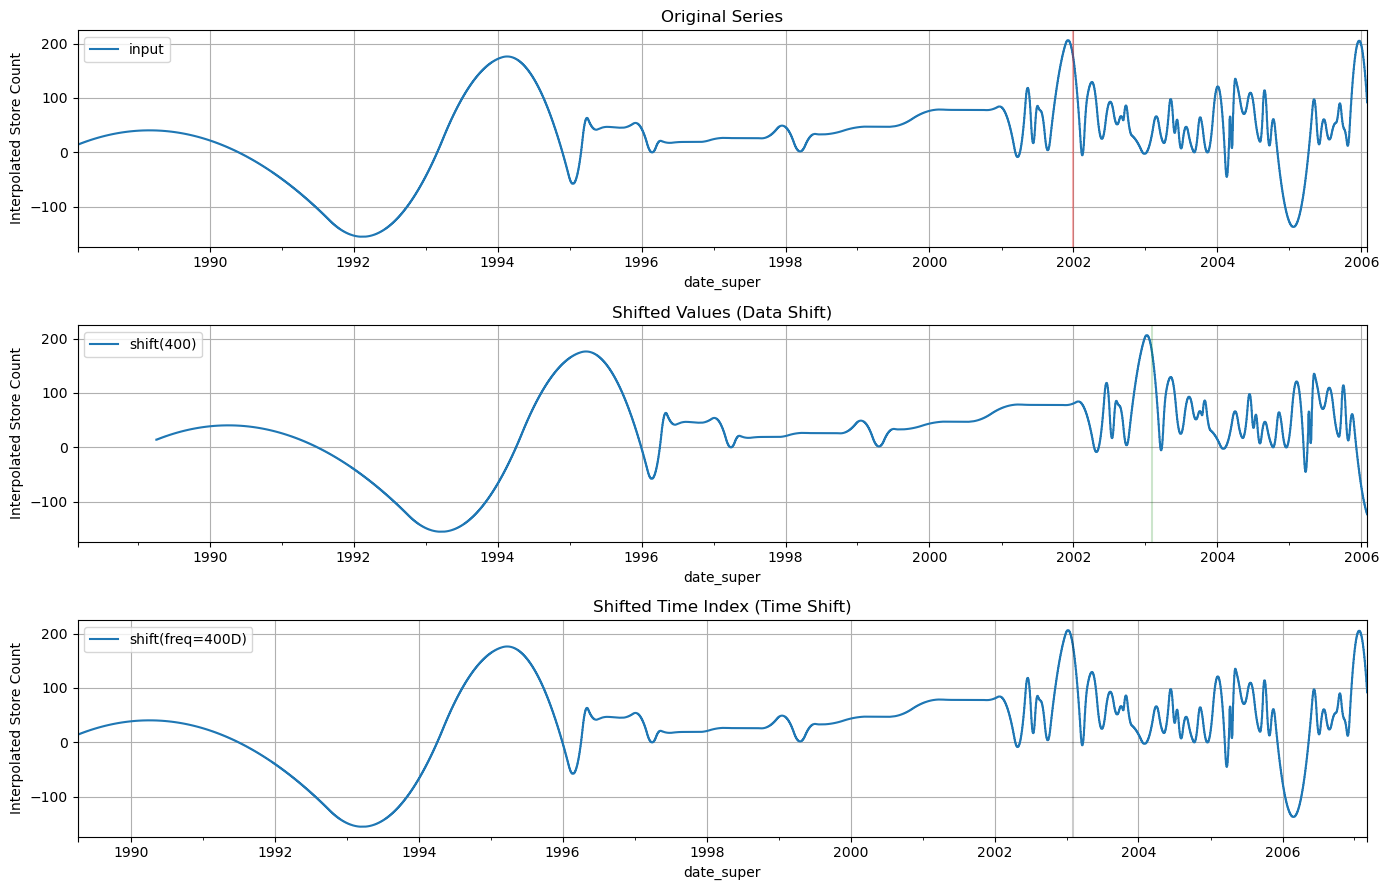

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(14, 9))
shift_val = 400  # jumlah hari untuk pergeseran

# --- Plot 1: data asli ---
walmart_store_count_series.plot(ax=ax[0])

# --- Plot 2: data digeser nilainya (shift isi data, bukan index) ---
walmart_store_count_series.shift(shift_val).plot(ax=ax[1])

# --- Plot 3: data digeser index waktunya ---
# tshift() sudah deprecated, gunakan shift(freq='D') untuk geser waktu
walmart_store_count_series.shift(freq=f'{shift_val}D').plot(ax=ax[2])

# --- Tambahan garis bantu ---
date_max = pd.to_datetime('2002-01-01')
delta = pd.Timedelta(shift_val, 'D')

# Gaya dan label untuk setiap subplot
ax[0].legend(['input'], loc=2)
ax[0].set_ylabel("Interpolated Store Count")
ax[0].axvline(date_max, alpha=0.3, color='red')

ax[1].legend([f'shift({shift_val})'], loc=2)
ax[1].set_ylabel("Interpolated Store Count")
ax[1].axvline(date_max + delta, alpha=0.2, color='green')

ax[2].legend([f'shift(freq={shift_val}D)'], loc=2)
ax[2].set_ylabel("Interpolated Store Count")
ax[2].axvline(date_max + delta, alpha=0.2, color='black')

# Tambahkan grid dan judul agar lebih informatif
for i, title in enumerate(["Original Series", 
                           "Shifted Values (Data Shift)", 
                           "Shifted Time Index (Time Shift)"]):
    ax[i].grid(True)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()
